In [ ]:
# !pip install tensorflow==(version number)

In [5]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [6]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ***LOAD DATASET***

In [24]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/miniproject AI/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Read csv file as dataframe with pandas
X_train = pd.read_csv('/content/drive/MyDrive/miniproject AI/input.csv',header=None)

In [8]:
#Read csv file as dataframe with pandas
Y_train = pd.read_csv('/content/drive/MyDrive/miniproject AI/labels.csv',header=None)

In [9]:
#Read csv file as dataframe with pandas
X_test = pd.read_csv('/content/drive/MyDrive/miniproject AI/input_test.csv',header=None)

In [10]:
#Read csv file as dataframe with pandas
Y_test = pd.read_csv('/content/drive/MyDrive/miniproject AI/labels_test.csv',header=None)

In [11]:
#convert datatype to float 32
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_test = X_test.astype('float32')
Y_test = Y_test.astype('float32')

In [12]:
#convert dataframe to numpy array
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [13]:
#reshape datasets
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

In [14]:
#X_train[1:] #you will get big n-D array now where you will see values from 1 to 255

In [15]:
#In image data,we will see values ranging from 0-255,so we divide it by 255
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
X_train[1:] #you will get big n-D array now where you will see values getting normalized between 0-1

In [26]:
print('Shape of X_train : ',X_train.shape)
print('Shape of Y_train : ',Y_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of Y_test : ',Y_test.shape)

Shape of X_train :  (2000, 100, 100, 3)
Shape of Y_train :  (2000, 1)
Shape of X_test :  (400, 100, 100, 3)
Shape of Y_test :  (400, 1)


In [36]:
#Import classes
#from tensorflow.keras--
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

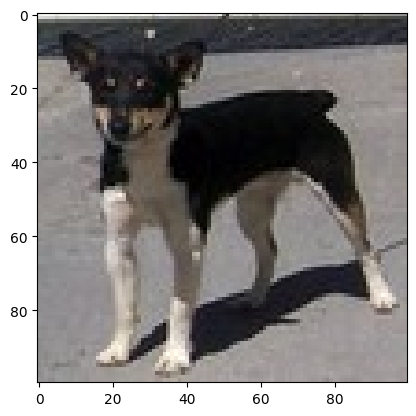

In [32]:
#taking any random image
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

**MODEL BUILDING**

In [38]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
 #ie,layers are going to be stacked up

In [39]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam' ,metrics= ['accuracy'] )

In [43]:
model.fit(X_train , Y_train , epochs = 5 , batch_size = 64 )

Epoch 1/5
32/32 [==============================] - 15s 483ms/step - loss: 0.1809 - accuracy: 0.9345
Epoch 2/5
32/32 [==============================] - 19s 583ms/step - loss: 0.1362 - accuracy: 0.9595
Epoch 3/5
32/32 [==============================] - 17s 508ms/step - loss: 0.1421 - accuracy: 0.9495
Epoch 4/5
32/32 [==============================] - 15s 480ms/step - loss: 0.1053 - accuracy: 0.9680
Epoch 5/5
32/32 [==============================] - 15s 484ms/step - loss: 0.0711 - accuracy: 0.9810


In [44]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 58ms/step - loss: 1.4676 - accuracy: 0.6225


[1.4675707817077637, 0.6225000023841858]

MAKING PREDICTIONS

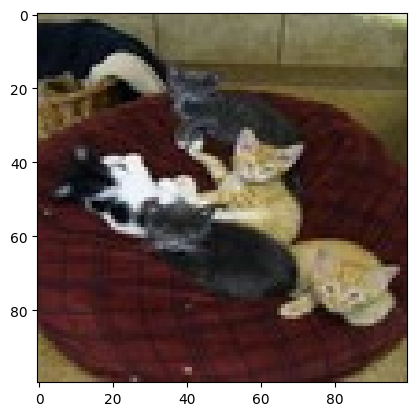

1/1 [==============================] - 0s 20ms/step
Our model says it is a :  cat


In [61]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
#print(y_pred)

if(y_pred > 0.5):
  pred='dog'
elif(y_pred < 0.5):
  pred='cat'

print('Our model says it is a : ',pred)